<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Cell_Phone_Plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d isurumahakumara/adlhack-isuru
! unzip '/content/adlhack-isuru.zip' -d '/content/data'

TARGET CLASS IS ORDINAL

In [ ]:
! pip install pycaret

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [27]:
ds_df = pd.read_csv("/content/data/train_dataset.csv")

In [28]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_identifier           10500 non-null  int64  
 1   device_type                  10477 non-null  object 
 2   device_category              10470 non-null  object 
 3   gender                       10365 non-null  object 
 4   district_name                10500 non-null  object 
 5   age_group                    10365 non-null  object 
 6   network_stay                 10500 non-null  int64  
 7   average_monthly_bill_amount  10500 non-null  float64
 8   dusage_sum                   10500 non-null  float64
 9   dusage_min                   10500 non-null  float64
 10  dusage_max                   10500 non-null  float64
 11  dusage_avg                   9642 non-null   float64
 12  dusage_days                  10500 non-null  float64
 13  dusage_stddev   

In [41]:
ds_df["dusage_avg"] = ds_df["dusage_avg"].fillna(0)
ds_df["vusage_onnet_avg"] = ds_df["vusage_onnet_avg"].fillna(0)
ds_df["vusage_offnet_avg"] = ds_df["vusage_offnet_avg"].fillna(0)

In [45]:
ds_df["add_on_count"] = ds_df["add_on_count"].fillna(0)
ds_df["add_on_tot_rental"] = ds_df["add_on_tot_rental"].fillna(0)

In [29]:
ds_df.nunique()

primary_identifier             10500
device_type                        3
device_category                    6
gender                             2
district_name                     26
age_group                          7
network_stay                     288
average_monthly_bill_amount    10313
dusage_sum                      7993
dusage_min                      6902
dusage_max                      9640
dusage_avg                      9641
dusage_days                       31
dusage_stddev                   9638
vusage_onnet_sum                 459
vusage_onnet_max                1358
vusage_onnet_min                   1
vusage_onnet_days                 30
vusage_onnet_avg                1455
vusage_onnet_stddev             1617
vusage_offnet_sum                590
vusage_offnet_max               2924
vusage_offnet_min                107
vusage_offnet_days                31
vusage_offnet_avg               6030
vusage_offnet_stddev            7051
number_of_fixed_bb_accounts        4
n

In [30]:
ds_df["next_month_plan"].value_counts()

PKG1    3673
PKG3    1717
PKG5    1558
PKG2    1354
PKG6     740
PKG4     735
PKG7     364
PKG8     359
Name: next_month_plan, dtype: int64

In [32]:
ds_df = ds_df[[c for c in list(ds_df) if c != "primary_identifier"]].copy()

In [33]:
ds_df.describe().round(5)

,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,...,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count
count,10500.00000,10500.00000,10500.00000,10500.00000,10500.00000,9642.00000,10500.00000,10500.00000,10500.00000,10500.00000,...,10500.00000,10500.00000,10500.00000,10500.00000,7187.00000,10500.00000,10500.00000,10500.00000,6667.00000,6667.00000
mean,91.98438,2083.92384,12813.02267,72.72305,1440.66784,492.63108,24.79152,330.03496,22.84552,6.04480,...,67.66086,14.70031,0.02457,8.97067,6.55991,3.49354,0.05286,0.24676,518.56007,1.88916
std,71.88878,1470.55022,15873.35399,168.97157,1846.41747,552.33266,9.67700,403.59419,121.65768,23.32780,...,130.19540,22.03938,0.36099,9.45468,7.52754,5.23199,0.23659,0.50085,622.86358,1.22414
min,3.00000,-11446.34000,0.00000,0.00000,0.00000,0.00004,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.01667,0.00000,0.00000,0.00000,0.00000,1.00000
25%,22.00000,1036.27000,1939.00000,0.00000,367.01334,123.66487,25.00000,89.72258,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,2.39783,0.00000,0.00000,0.00000,200.00000,1.00000
50%,82.00000,1783.84500,7800.50000,2.38520,977.32167,328.18108,30.00000,232.34868,0.00000,0.00000,...,17.00000,6.85833,0.00000,6.00000,4.41930,1.61414,0.00000,0.00000,360.00000,2.00000
75%,149.00000,2700.59250,17836.00000,64.01298,1840.25478,665.46328,30.00000,424.42379,0.00000,0.00000,...,85.00000,21.08750,0.00000,16.00000,7.85111,5.01664,0.00000,0.00000,650.00000,2.00000
max,314.00000,19007.89000,176410.00000,3501.54092,30513.07163,7386.10075,30.00000,6913.56807,3009.00000,423.28333,...,2642.00000,477.30000,25.56667,30.00000,107.99815,90.94479,3.00000,3.00000,19450.00000,24.00000



# II. Preprocessing

In [46]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, stratify=ds_df["next_month_plan"], random_state=1)

# III. Create Models

In [47]:
exp_clf101 = setup(data=train_df, target = "next_month_plan", session_id=123,
                   fix_imbalance=True)


,Description,Value
0,Session id,123
1,Target,next_month_plan
2,Target type,Multiclass
3,Target mapping,"PKG1: 0, PKG2: 1, PKG3: 2, PKG4: 3, PKG5: 4, PKG6: 5, PKG7: 6, PKG8: 7"
4,Original data shape,"(8400, 30)"
5,Transformed data shape,"(18968, 43)"
6,Transformed train set shape,"(16448, 43)"
7,Transformed test set shape,"(2520, 43)"
8,Ordinal features,1
9,Numeric features,24


In [48]:
best_model = compare_models(fold=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5274,0.8645,0.5274,0.5294,0.5257,0.4114,0.4123,65.8780
lightgbm,Light Gradient Boosting Machine,0.5243,0.8581,0.5243,0.5088,0.5142,0.4006,0.4015,6.7780
rf,Random Forest Classifier,0.5228,0.8518,0.5228,0.5125,0.5153,0.4018,0.4026,5.1120
et,Extra Trees Classifier,0.4934,0.8275,0.4934,0.4626,0.4726,0.3528,0.3551,3.3100
dt,Decision Tree Classifier,0.4245,0.6546,0.4245,0.4469,0.4339,0.2911,0.2916,0.7940
ada,Ada Boost Classifier,0.4034,0.7425,0.4034,0.4494,0.4101,0.2783,0.2832,2.6920
lda,Linear Discriminant Analysis,0.3920,0.7946,0.3920,0.4447,0.4003,0.2715,0.2766,0.5980
ridge,Ridge Classifier,0.3728,0.0000,0.3728,0.4084,0.3735,0.2424,0.2468,0.3880
dummy,Dummy Classifier,0.3497,0.5000,0.3497,0.1223,0.1812,0.0000,0.0000,0.8460
knn,K Neighbors Classifier,0.3491,0.6813,0.3491,0.4172,0.3726,0.2181,0.2206,0.6520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

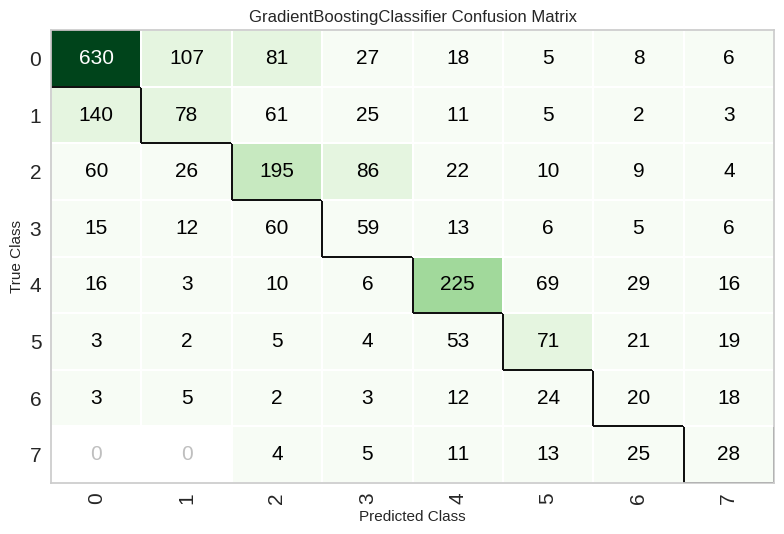

In [49]:
plot_model(best_model, plot = "confusion_matrix")

In [50]:
import pycaret.regression as auto_reg

In [51]:
train_df["numeric_next_month_plan"] = train_df[
    "next_month_plan"].str[-1].astype(int)

In [52]:
train_df.head()

,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,...,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan,numeric_next_month_plan
8769,4G,Smartphone,MALE,Kegalle,40-50,128,1620.43,13243.0,71.068861,1045.879817,...,0.000000,10.0,2.001667,1.457577,0.0,2.0,110.0,1.0,PKG1,1
9837,4G,Smartphone,MALE,Puttalam,50-60,129,654.80,257.0,0.000000,155.428735,...,0.000000,12.0,3.598611,2.500485,0.0,1.0,0.0,0.0,PKG1,1
158,2G,Basic,FEMALE,Gampaha,20-30,9,804.20,0.0,0.000000,0.005577,...,0.000000,0.0,0.000000,0.000000,1.0,0.0,110.0,1.0,PKG1,1
1780,4G,Smartphone,FEMALE,Colombo,30-40,170,4539.66,19113.0,0.000000,1608.634660,...,0.000000,2.0,4.141667,1.499781,0.0,0.0,1400.0,3.0,PKG1,1
5127,2G,Feature phone,MALE,Gampaha,60-70,4,938.85,0.0,0.000000,0.000000,...,0.533333,20.0,9.106667,9.038173,0.0,0.0,0.0,0.0,PKG2,2


In [54]:
reg_models = auto_reg.setup(
    data=train_df, target = "numeric_next_month_plan", session_id=124,
    ignore_features=["next_month_plan"])


,Description,Value
0,Session id,124
1,Target,numeric_next_month_plan
2,Target type,Regression
3,Original data shape,"(8400, 31)"
4,Transformed data shape,"(8400, 43)"
5,Transformed train set shape,"(5880, 43)"
6,Transformed test set shape,"(2520, 43)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,24


In [55]:
best_reg_model = auto_reg.compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.8112,1.3051,1.1419,0.6912,0.2967,0.4058,2.8620
et,Extra Trees Regressor,0.8274,1.3383,1.1566,0.6836,0.2995,0.4174,3.0140
rf,Random Forest Regressor,0.8055,1.3410,1.1576,0.6830,0.2986,0.3999,6.0000
lightgbm,Light Gradient Boosting Machine,0.8086,1.3415,1.1576,0.6827,0.2986,0.3951,1.1220
ada,AdaBoost Regressor,1.0023,1.6662,1.2905,0.6061,0.3441,0.5569,0.6720
br,Bayesian Ridge,1.1323,2.0694,1.4378,0.5112,0.3728,0.5860,0.3260
ridge,Ridge Regression,1.1316,2.0744,1.4395,0.5100,0.3737,0.5856,0.3460
lr,Linear Regression,1.1318,2.0750,1.4397,0.5099,0.3738,0.5858,1.1600
en,Elastic Net,1.1426,2.0983,1.4478,0.5043,0.3715,0.5869,0.7700
lasso,Lasso Regression,1.1518,2.1257,1.4572,0.4979,0.3709,0.5896,0.3740


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

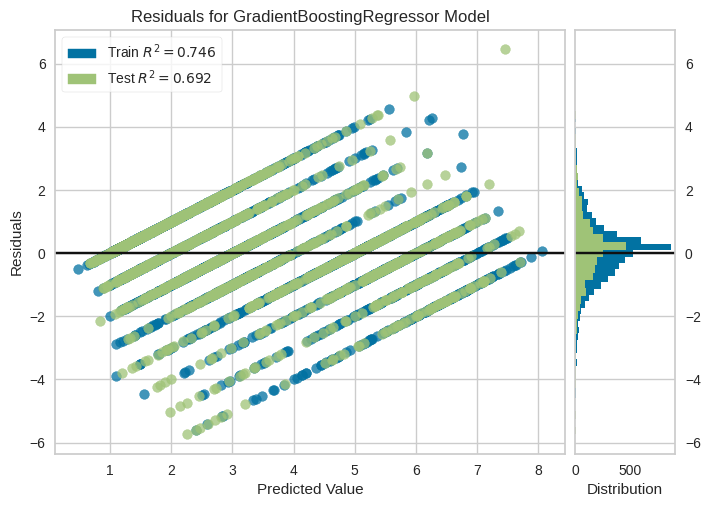

In [56]:
auto_reg.plot_model(best_reg_model)

In [57]:
best_reg_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=124, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
gbr = auto_reg.create_model("gbr", fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8286,1.4259,1.1941,0.6626,0.3060,0.4202
1,0.8024,1.2078,1.0990,0.7171,0.2963,0.4257
2,0.7977,1.2304,1.1092,0.7217,0.2885,0.3882
3,0.8164,1.3122,1.1455,0.6946,0.2953,0.3907
4,0.8108,1.3491,1.1615,0.6600,0.2973,0.4042
Mean,0.8112,1.3051,1.1419,0.6912,0.2967,0.4058
Std,0.0109,0.0795,0.0347,0.0261,0.0056,0.0151


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [61]:
preds_gbr = auto_reg.predict_model(gbr, data=train_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.7647,1.1439,1.0695,0.7296,0.2821,0.3863


In [62]:
preds_gbr

,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,...,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan,numeric_next_month_plan,prediction_label
8769,4G,Smartphone,MALE,Kegalle,40-50,128,1620.430054,13243.0,71.068863,1045.879761,...,10.0,2.001667,1.457577,0.0,2.0,110.0,1.0,PKG1,1,2.632670
9837,4G,Smartphone,MALE,Puttalam,50-60,129,654.799988,257.0,0.000000,155.428741,...,12.0,3.598611,2.500484,0.0,1.0,0.0,0.0,PKG1,1,1.187150
158,2G,Basic,FEMALE,Gampaha,20-30,9,804.200012,0.0,0.000000,0.005577,...,0.0,0.000000,0.000000,1.0,0.0,110.0,1.0,PKG1,1,1.361818
1780,4G,Smartphone,FEMALE,Colombo,30-40,170,4539.660156,19113.0,0.000000,1608.634644,...,2.0,4.141667,1.499781,0.0,0.0,1400.0,3.0,PKG1,1,4.190868
5127,2G,Feature phone,MALE,Gampaha,60-70,4,938.849976,0.0,0.000000,0.000000,...,20.0,9.106667,9.038174,0.0,0.0,0.0,0.0,PKG2,2,1.147927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,4G,Smartphone,MALE,Gampaha,40-50,224,3333.860107,16193.0,147.187042,888.285217,...,7.0,11.871428,6.542211,0.0,0.0,0.0,0.0,PKG7,7,5.231095
868,4G,Smartphone,FEMALE,Kandy,30-40,195,4267.910156,14986.0,31.445683,2118.884033,...,1.0,10.100000,1.843999,0.0,1.0,380.0,3.0,PKG3,3,5.086228
7047,4G,Smartphone,MALE,Colombo,30-40,106,1980.760010,3244.0,0.000000,1114.770264,...,4.0,2.275000,1.224891,1.0,0.0,0.0,0.0,PKG5,5,3.599561
2215,4G,Smartphone,FEMALE,Colombo,60-70,180,2550.580078,1703.0,0.000000,698.828552,...,21.0,2.100794,2.366791,0.0,0.0,450.0,2.0,PKG3,3,2.593160


In [65]:
import seaborn as sns

<Axes: xlabel='numeric_next_month_plan', ylabel='prediction_label'>

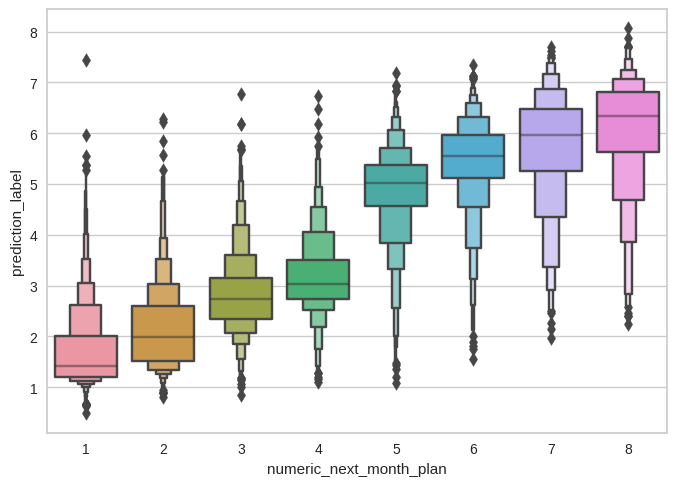

In [67]:
sns.boxenplot(data=preds_gbr, x="numeric_next_month_plan", y="prediction_label")

Next Steps: Predict <= 4, and then predict cell phone plan.